In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
from resources.single_data.KNN_AR import KNN_AR
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
from resources.vectorised_data.MISO.ARX_repr.RF_ARX import RF_ARX
import matplotlib.pyplot as plt
import pandas as pd
import julia
from julia import Pkg
from julia import Main
import Get_Vectorised_Data
Pkg.add("DecisionTree")
Main.using("DecisionTree")
import numpy as np
from single_data.rolling_AR import AR_predict
%load_ext julia.magic

[*********************100%***********************]  2 of 2 completed
make_diff()
                 ^GSPC       ^IXIC
Date                              
2021-01-04  -55.420166 -189.830078
2021-01-05   26.210205  120.509766
2021-01-06   21.279785  -78.169922
2021-01-07   55.650146  326.690430
2021-01-08   20.889893  134.500000
...                ...         ...
2022-05-02   23.449707  201.379883
2022-05-03   20.100098   27.740234
2022-05-04  124.689941  401.100586
2022-05-05 -153.299805 -647.169922
2022-05-06  -23.530273 -173.030273

[339 rows x 2 columns]
Initializing Julia interpreter. This may take some time...


In [2]:
getter = Get_Data.Get_Data("^IXIC", start="2018-08-22", end="2019-10-30", interval="1d")
ixic_vec_norm = getter.make_diff()
ixic_vec_log = getter.make_log_diff()

make_diff()
make_diff()


analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -18.071  |  Wartość krytyczna dla 5%: -2.

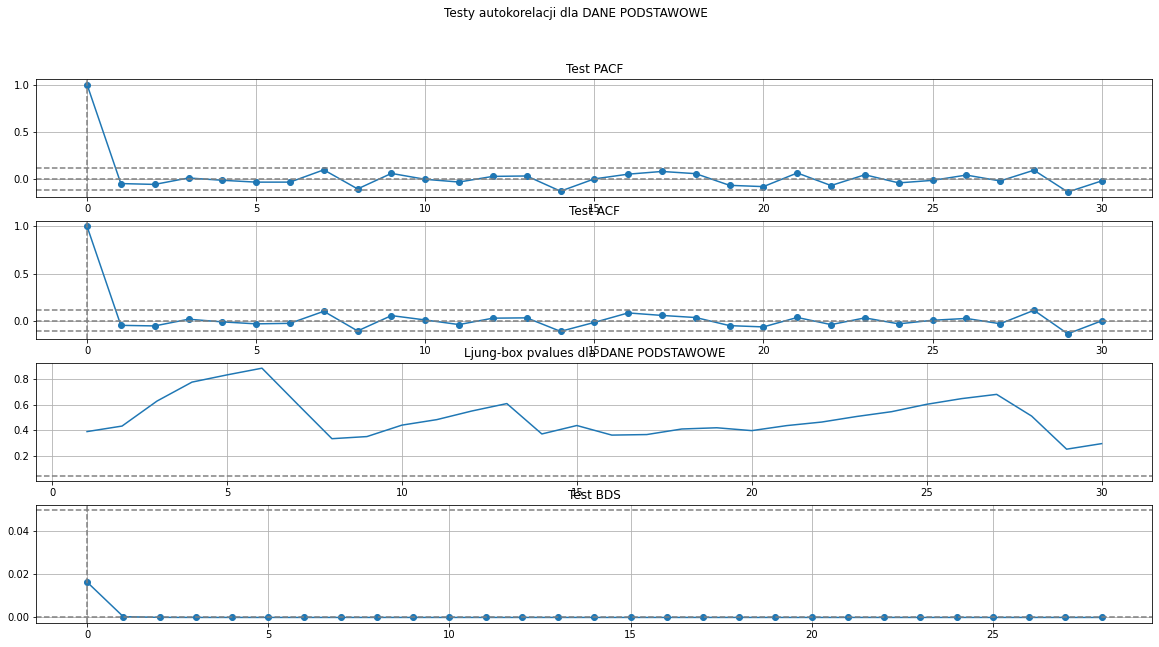

Pvalue testu Jarque-Bera:  2.435845969372963e-10
Statystyka testu Jarque-Bera:  44.27111376015418


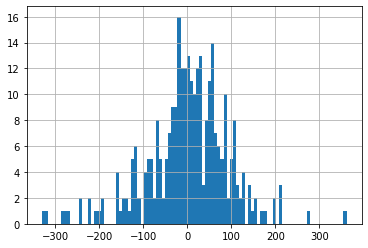

In [3]:
getter.analiza_statystyczna_szeregu(ixic_vec_norm)

In [23]:
cart_ar = CART_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = cart_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/3, params = {
    "max_depth": 10,
    "min_samples_split": 5,
    "min_samples_leaf": 5,
})
print(opt)
cart_ar.fit(opt)

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   29456656            0     17421000    458937281      4425156  ticks
       #2  4200 MHz   25032546            0      5252046    475530343       117828  ticks
       #3  4200 MHz   39169687            0     10470562    456174687       264125  ticks
       #4  4200 MHz   27043187            0      5902859    472868890        95781  ticks
       #5  4200 MHz   36910140            0      8371015    460533640       177531  ticks
       #6  4200 MHz   24455937            0      4861437    476497421       101250  ticks
       #7  4200 MHz   35221421            0      7405562    463187812       139250  ticks
       #8  4200 MHz   35034890            0      6750968    464028937     

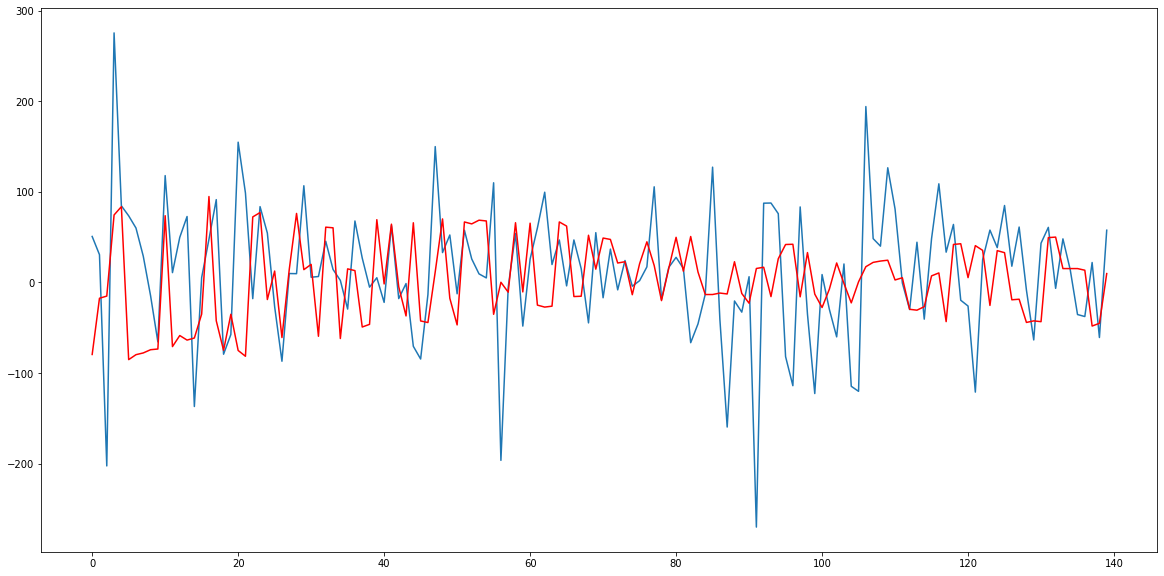

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(cart_ar.data[cart_ar.prog:].values))
plt.plot(np.cumsum(cart_ar.predictions), c='r')

forecast_raw


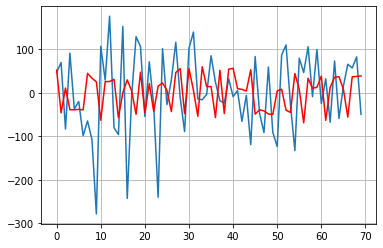

In [26]:
plt.plot(np.cumsum(cart_ar.data_test.values))
plt.plot(np.cumsum(cart_ar.forecast_raw()), c='r')
plt.grid()

In [7]:
rf_ar = RF_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt_rf = rf_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/3, params = {
    "max_depth": 5,
    "n_estimators": 5,
    "min_samples_split": 5,
    "min_samples_leaf": 5
})


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   29430359            0     17415437    458788968      4424203  ticks
       #2  4200 MHz   25015640            0      5250109    475369015       117750  ticks
       #3  4200 MHz   39143359            0     10466812    456024593       264062  ticks
       #4  4200 MHz   27023765            0      5900406    472710593        95750  ticks
       #5  4200 MHz   36888265            0      8364375    460381984       177421  ticks
       #6  4200 MHz   24441562            0      4859328    476333734       101203  ticks
       #7  4200 MHz   35184531            0      7398187    463051906       139156  ticks
       #8  4200 MHz   35020546            0      6749250    463864828    

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll



2, 1, 2, 3
2, 1, 2, 4
2, 1, 2, 5
2, 1, 3, 2
2, 1, 3, 3
2, 1, 3, 4
2, 1, 3, 5
2, 1, 4, 2
2, 1, 4, 3
2, 1, 4, 4
2, 1, 4, 5
2, 1, 5, 2
2, 1, 5, 3
2, 1, 5, 4
2, 1, 5, 5
2, 2, 2, 2
2, 2, 2, 3
2, 2, 2, 4
2, 2, 2, 5
2, 2, 3, 2
2, 2, 3, 3
2, 2, 3, 4
2, 2, 3, 5
2, 2, 4, 2
2, 2, 4, 3
2, 2, 4, 4
2, 2, 4, 5
2, 2, 5, 2
2, 2, 5, 3
2, 2, 5, 4
2, 2, 5, 5
2, 3, 2, 2
2, 3, 2, 3
2, 3, 2, 4
2, 3, 2, 5
2, 3, 3, 2
2, 3, 3, 3
2, 3, 3, 4
2, 3, 3, 5
2, 3, 4, 2
2, 3, 4, 3
2, 3, 4, 4
2, 3, 4, 5
2, 3, 5, 2
2, 3, 5, 3
2, 3, 5, 4
2, 3, 5, 5
2, 4, 2, 2
2, 4, 2, 3
2, 4, 2, 4
2, 4, 2, 5
2, 4, 3, 2
2, 4, 3, 3
2, 4, 3, 4
2, 4, 3, 5
2, 4, 4, 2
2, 4, 4, 3
2, 4, 4, 4
2, 4, 4, 5
2, 4, 5, 2
2, 4, 5, 3
2, 4, 5, 4
2, 4, 5, 5
2, 5, 2, 2
2, 5, 2, 3
2, 5, 2, 4
2, 5, 2, 5
2, 5, 3, 2
2, 5, 3, 3
2, 5, 3, 4
2, 5, 3, 5
2, 5, 4, 2
2, 5, 4, 3
2, 5, 4, 4
2, 5, 4, 5
2, 5, 5, 2
2, 5, 5, 3
2, 5, 5, 4
2, 5, 5, 5
3, 1, 2, 2
3, 1, 2, 3
3, 1, 2, 4
3, 1, 2, 5
3, 1, 3, 2
3, 1, 3, 3
3, 1, 3, 4
3, 1, 3, 5
3, 1, 4, 2
3, 1, 4, 3
3, 1, 4, 4
3, 1, 4, 

{'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 2, 'min_samples_split': 2}
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 

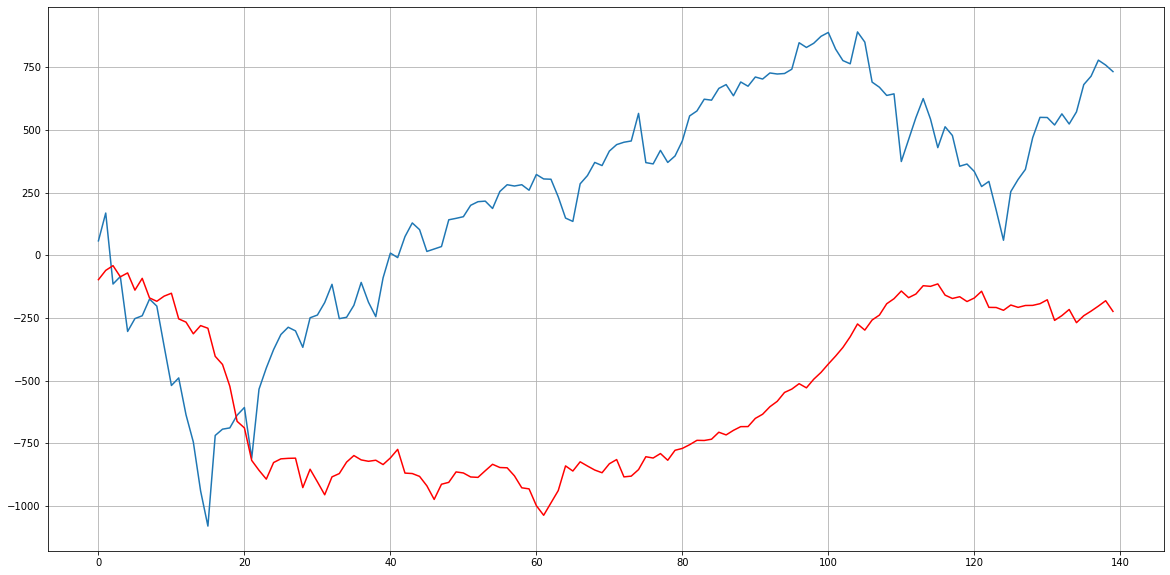

In [8]:
rf_ar.fit(opt_rf)

plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(rf_ar.data[rf_ar.prog:].values))
plt.plot(np.cumsum(rf_ar.predictions), c='r')
plt.grid()

forecast_raw
89 89
forecast_raw


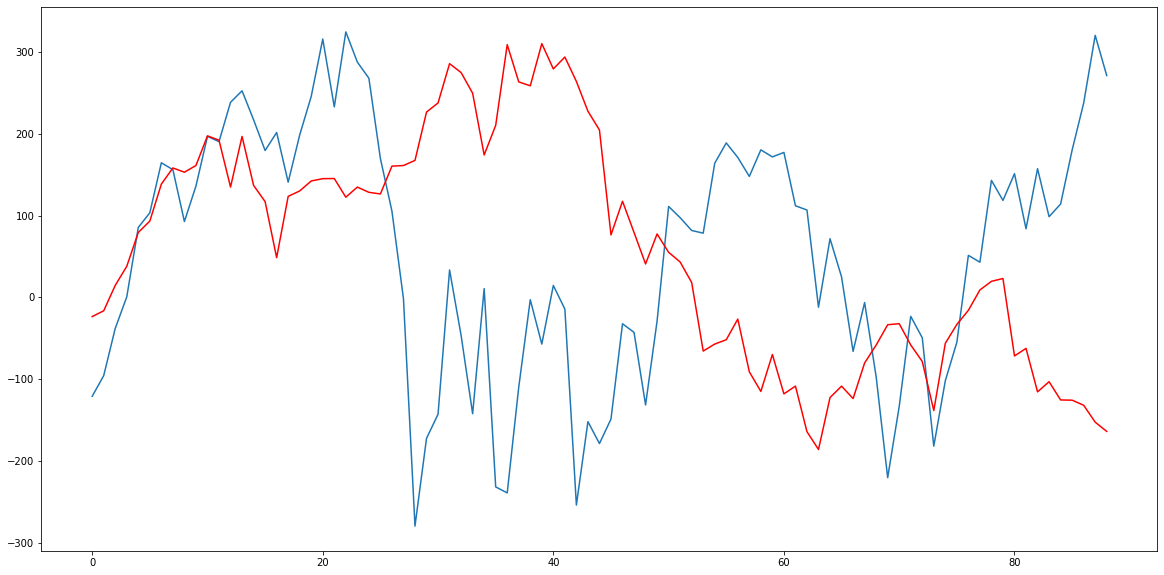

In [9]:
print(len(np.cumsum(rf_ar.data_test.values)), len(rf_ar.forecast_raw()))
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(rf_ar.data_test.values))
plt.plot(np.cumsum(rf_ar.forecast_raw()) , c='r')

In [10]:
knn_ar = KNN_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt_knn = knn_ar.cross_validation_rolling_window(dlugosc_okna=1/3, params={"k_neighbors":10,"weights":['uniform', 'distance'],"p":[1, 2]})

1
2
3
4
5
6
7
8
9
cross_validation_rolling_window


{'k_neighbors': 9, 'weights': 'uniform', 'p': 1}
fit


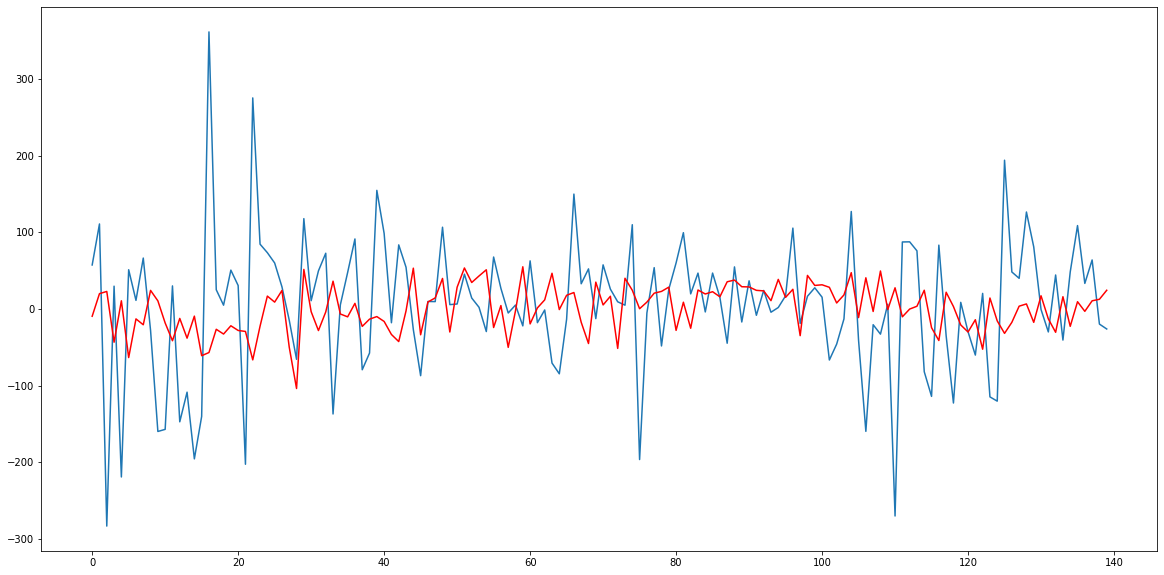

In [11]:
knn_ar.fit(opt_knn)

plt.figure(figsize=(20, 10))
plt.plot(knn_ar.data[knn_ar.prog:].values)
plt.plot(knn_ar.predictions, c='r')

forecast_raw


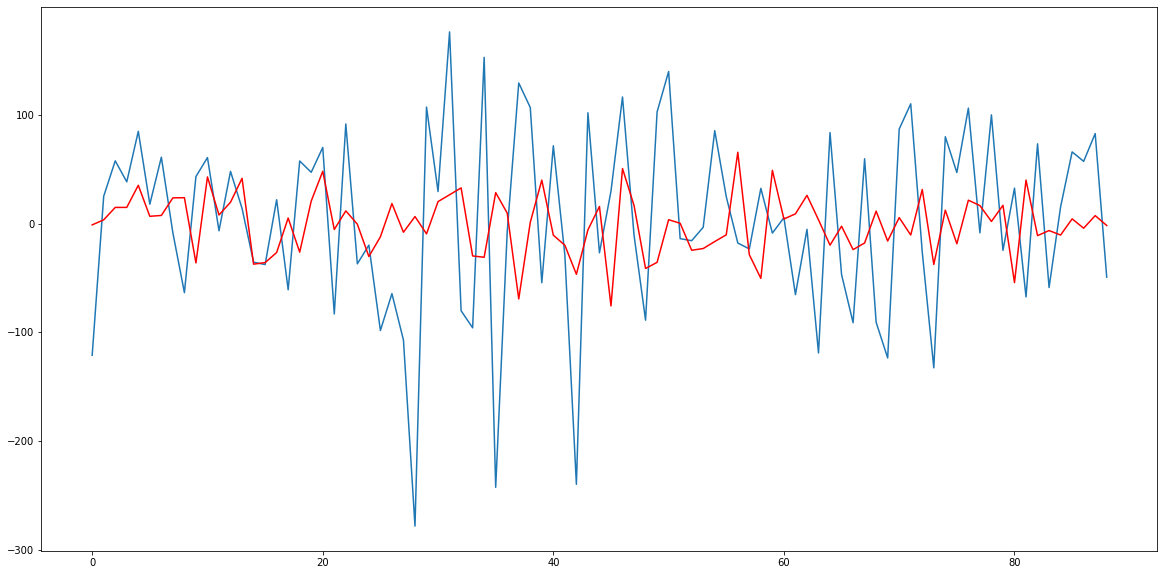

In [12]:
plt.figure(figsize=(20,10))
plt.plot(knn_ar.data_test.values)
plt.plot(knn_ar.forecast_raw(), c='r')

90
forecast_raw
90
forecast_raw


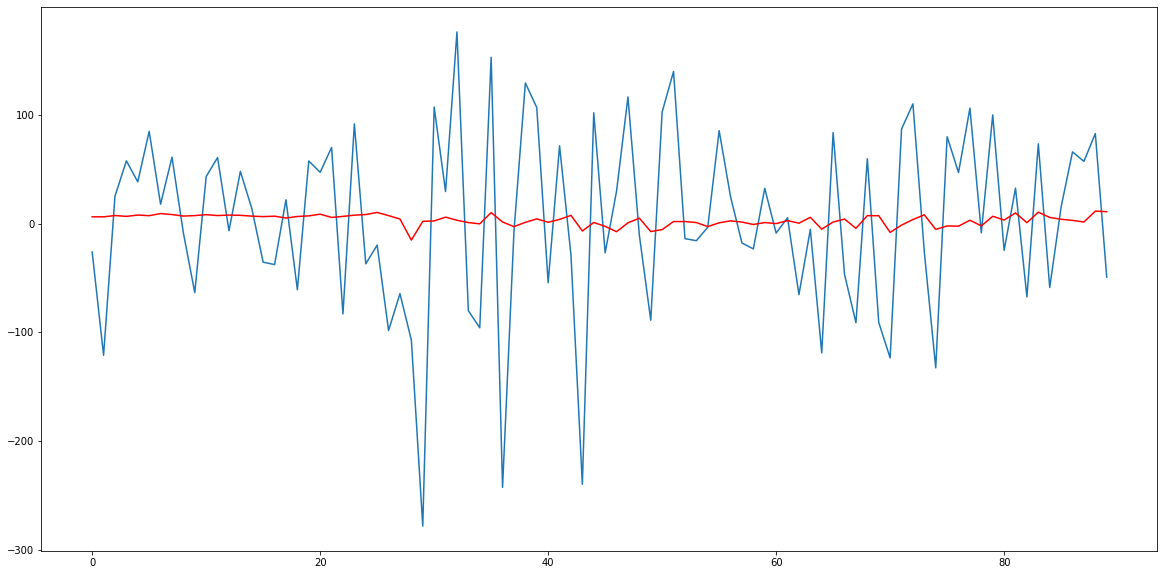

In [13]:
ar = AR_predict(data=ixic_vec_norm, p=1, test_ratio=.7, okno=1/3)
plt.figure(figsize=(20, 10))
print(len(ar.test.values))
print(len(ar.forecast_raw()))
plt.plot(ar.test.values)
plt.plot(ar.forecast_raw(), c='r')

In [14]:
def MSE(actual, preds):
    mse = (1 / len(preds)) * ((actual - preds) ** 2).sum()
    return mse
#print(len(cart_ar.data_test), len(cart_ar.forecast_raw()))
errors = pd.DataFrame(columns=["CART", "RF", "KNN", "AR"], index=["MSE"])
errors["CART"]["MSE"] = MSE(cart_ar.data_test.values, cart_ar.forecast_raw())
errors["RF"]["MSE"] = MSE(rf_ar.data_test.values, rf_ar.forecast_raw())
errors["KNN"]["MSE"] = MSE(knn_ar.data_test.values, knn_ar.forecast_raw())
errors["AR"]["MSE"] = MSE(ar.test.values, ar.forecast_raw())
errors

forecast_raw
forecast_raw
forecast_raw
forecast_raw


,CART,RF,KNN,AR
MSE,807343.558018,763396.160668,719314.555345,7047.788183


In [15]:
fitted_cart = cart_ar.predict()
fitted_rf = rf_ar.predict()
fitted_knn = knn_ar.predict()
cart_ar.data[cart_ar.prog:].values[:, 0]

array([-159.66992188, -156.93017578,   30.18017578, -147.08007812,
       -108.41992188, -195.41992188, -140.0703125 ,  361.43994141,
         25.13037109,    5.02978516,   50.75976562,   30.66015625,
       -202.43994141,  275.35986328,   84.61035156,   73.52978516,
         60.08007812,   28.98974609,  -14.58984375,  -65.56005859,
        117.91015625,   10.85986328,   49.77001953,   72.77001953,
       -136.87011719,    5.41015625,   47.68994141,   91.39990234,
        -79.1796875 ,  -57.39013672,  154.79003906,   98.66015625,
        -17.87011719,   83.66992188,   54.54003906,  -26.80029297,
        -86.9296875 ,    9.85009766,    9.69970703,  106.72021484,
          5.75976562,    6.5703125 ,   45.45996094,   14.35986328,
          2.29980469,  -29.35986328,   67.83007812,   26.91992188,
         -5.16015625,    5.20996094,  -21.97998047,   62.8203125 ,
        -17.78027344,   -1.20996094,  -70.43994141,  -84.45996094,
        -13.31982422,  149.91992188,   32.96972656,   52.38037

In [16]:
predictions = pd.DataFrame({"CART": fitted_cart, "RF": fitted_rf, "KNN": fitted_knn, "ACTUAL": cart_ar.data[cart_ar.prog:].values[:, 0]})

forecasts = pd.DataFrame({"CART": cart_ar.forecast_raw(), "RF": rf_ar.forecast_raw(), "KNN": knn_ar.forecast_raw(), "ACTUAL": knn_ar.data_test.values[:, 0]})

optimum = pd.DataFrame({"CART": opt, "RF": opt_rf, "KNN": opt_knn})

forecast_raw
forecast_raw
forecast_raw


ValueError: All arrays must be of the same length

In [ ]:
optimum.to_excel("OPTIMUM.xlsx")
predictions.to_excel("PREDICTIONS.xlsx")
forecasts.to_excel("FORECASTS.xlsx")
errors.to_excel("ERRORS.xlsx")

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(forecasts, label=forecasts.columns)
plt.legend()